# Vendor Performance Analysis

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats

warnings.filterwarnings('ignore')

In [13]:
conn=sqlite3.connect('Downloads/data/inventory.db')

df=pd.read_sql_query('select * from vendor_sales_summary',conn)

In [15]:
df.head()

,VendorNumber,VendorName,Brand,Description,purchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,5101919.51,672819.31,142049.0,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,4819073.49,561512.37,160247.0,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,4538120.60,461140.15,187140.0,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,4475972.88,420050.01,200412.0,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,4223107.62,545778.28,135838.0,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


### Exploratory Data Analysis
In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns,
identify anomalies, and ensure data quality before proceeding with further analysis.

In [21]:
# summary Stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
purchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05


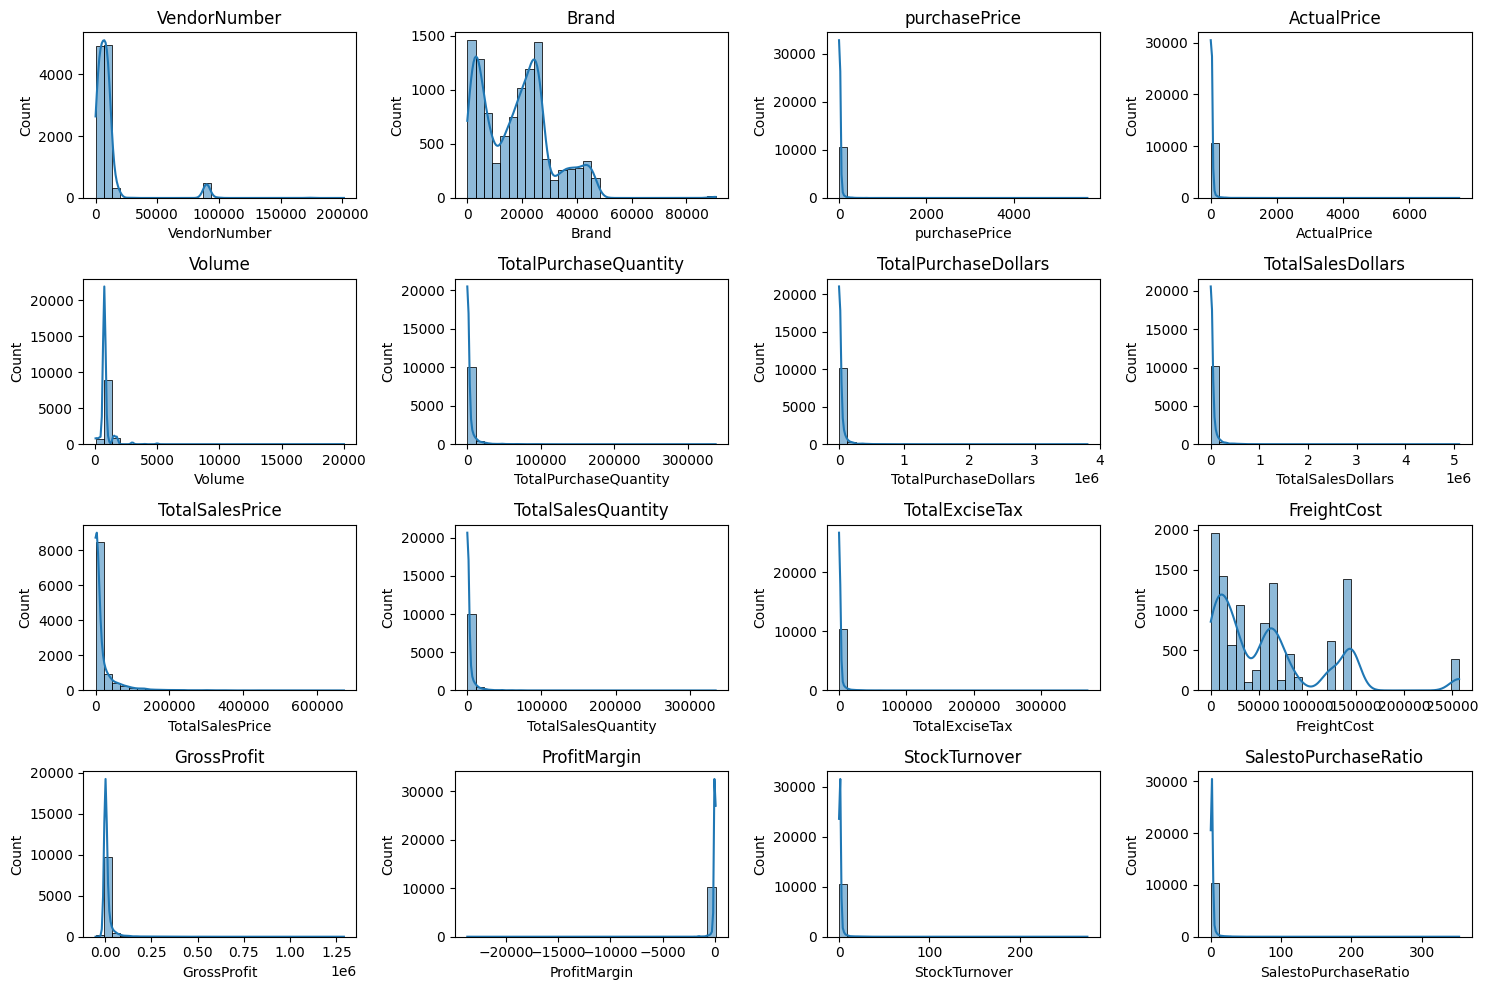

In [29]:
# distribution plot for numercal columns
numerical_cols=df.select_dtypes(exclude=object).columns

plt.figure(figsize=(15,10))
for i ,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

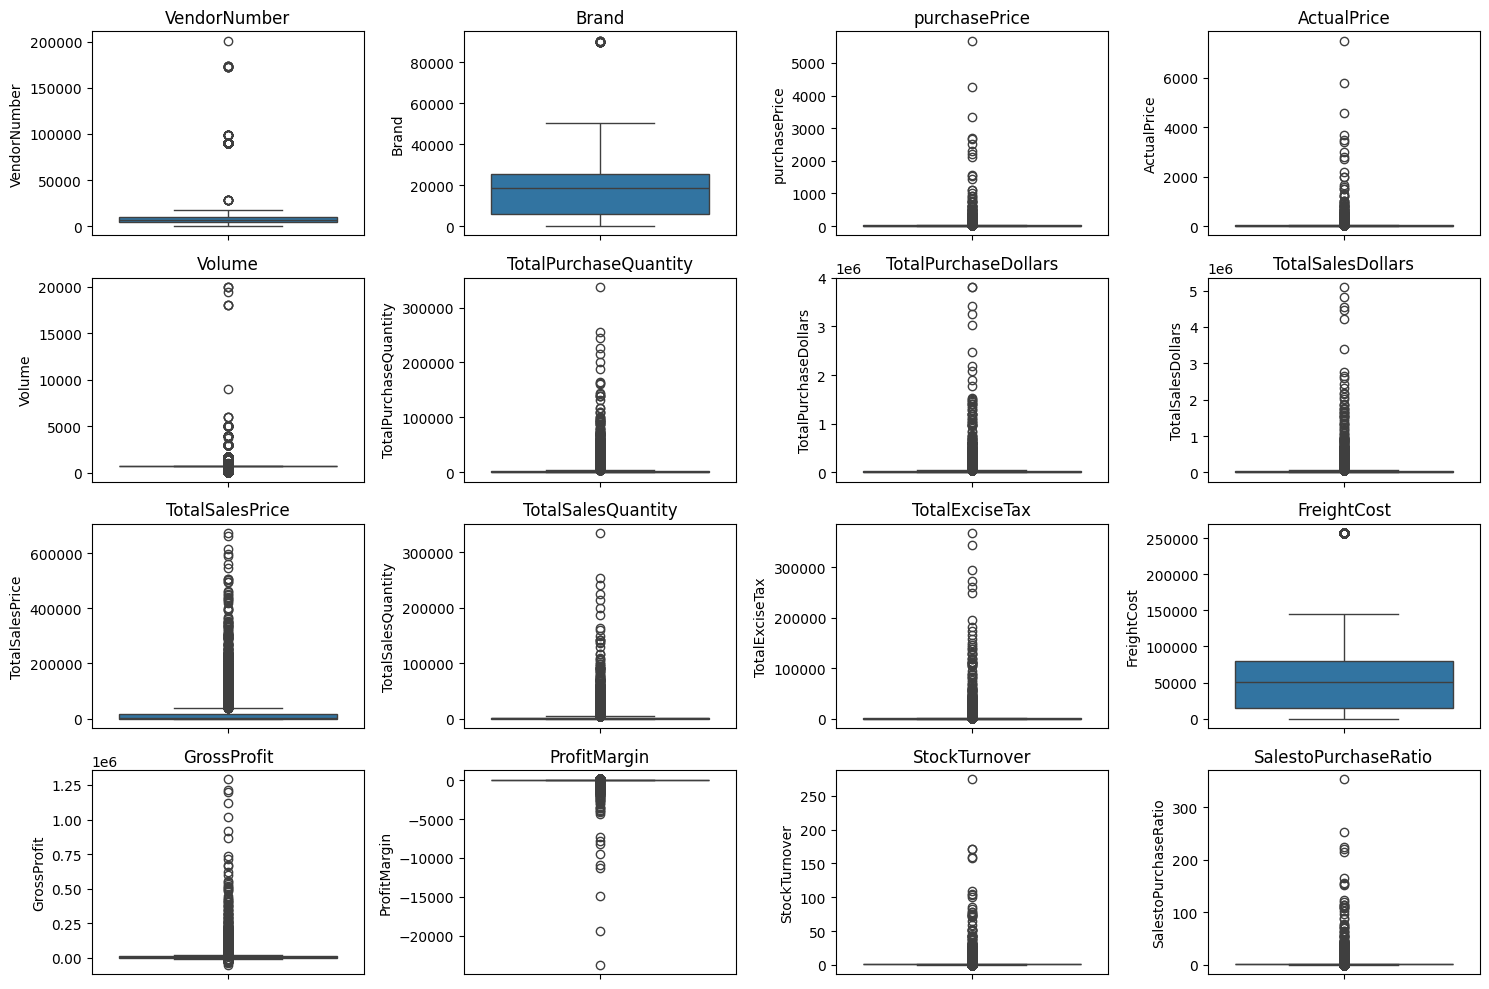

In [33]:
#outlier detection with box plot
plt.figure(figsize=(15,10))
for i ,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

#### Summary Statistics Insight
##### Negative & Zero Values:
• Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or    selling at discounts lower than the purchase price..

• Profit Margin: Has a minimum of -o, which suggests cases where revenue is zero or even lower than costs.

• Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-        moving or obsolete stock.
##### Outliers Indicated by High Standard Deviations:
• Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64, indicating potential   premium products.

• Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.

• Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more     than 1 indicates that Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older    stock.



In [47]:
# filtering the data by removing incosistencies

df=pd.read_sql_query("""select *
from vendor_sales_summary
where GrossProfit>0
and ProfitMargin>0
and TotalSalesQuantity>0
""",conn)

In [49]:
df.head()

,VendorNumber,VendorName,Brand,Description,purchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,5101919.51,672819.31,142049.0,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,4819073.49,561512.37,160247.0,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,4538120.60,461140.15,187140.0,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,4475972.88,420050.01,200412.0,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,4223107.62,545778.28,135838.0,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


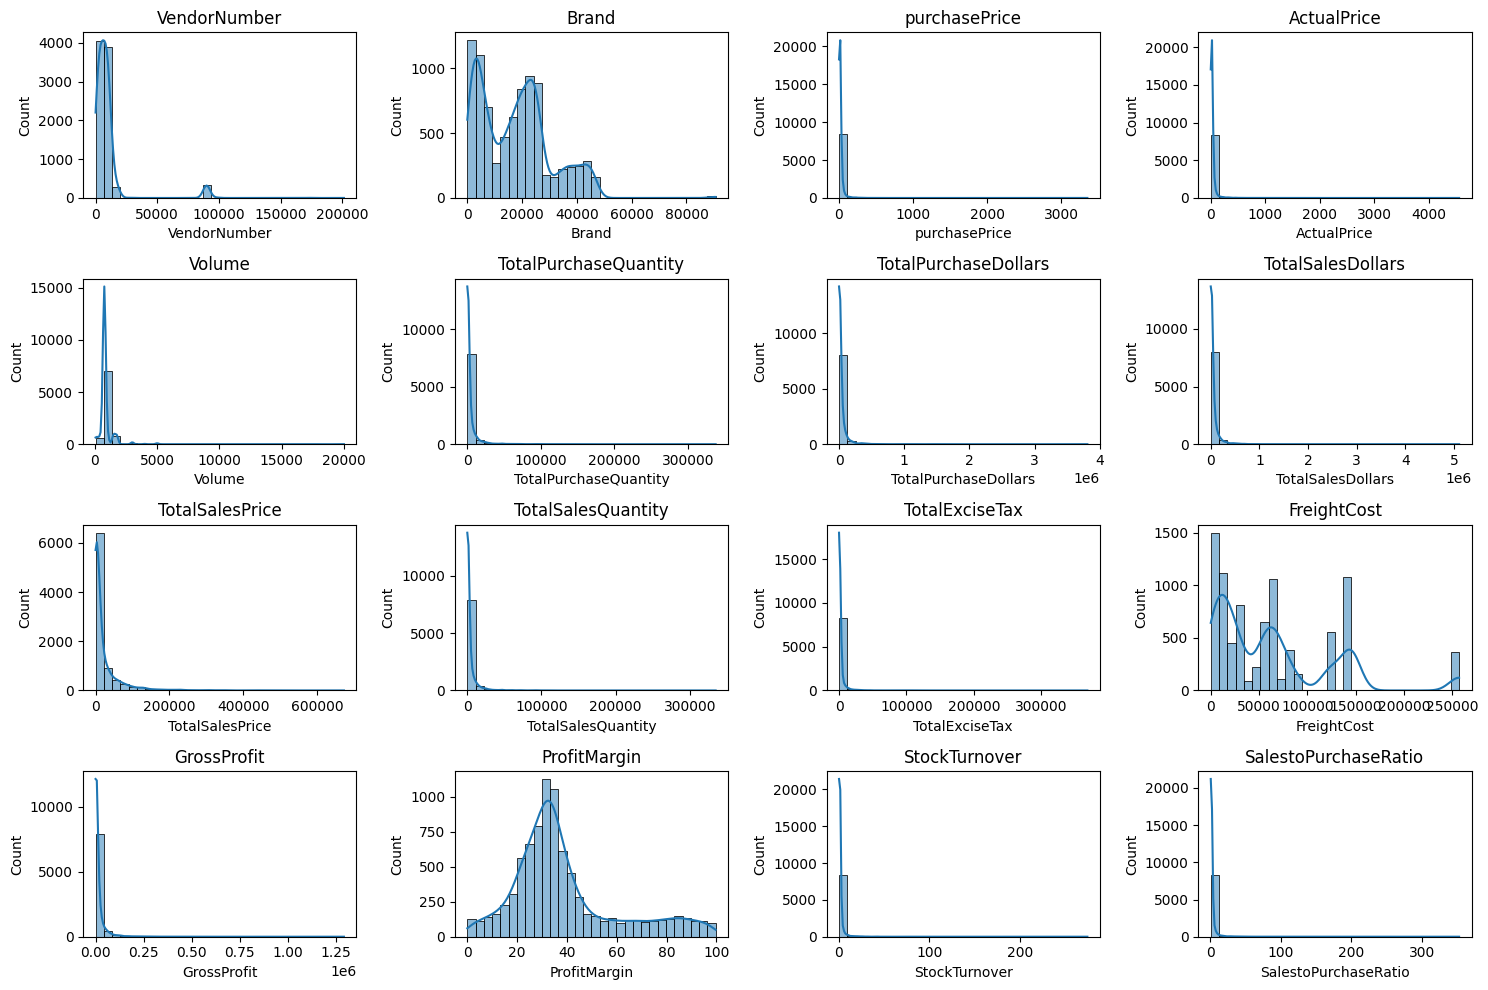

In [51]:
# distribution plot for numercal columns after filtering
numerical_cols=df.select_dtypes(exclude=object).columns

plt.figure(figsize=(15,10))
for i ,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

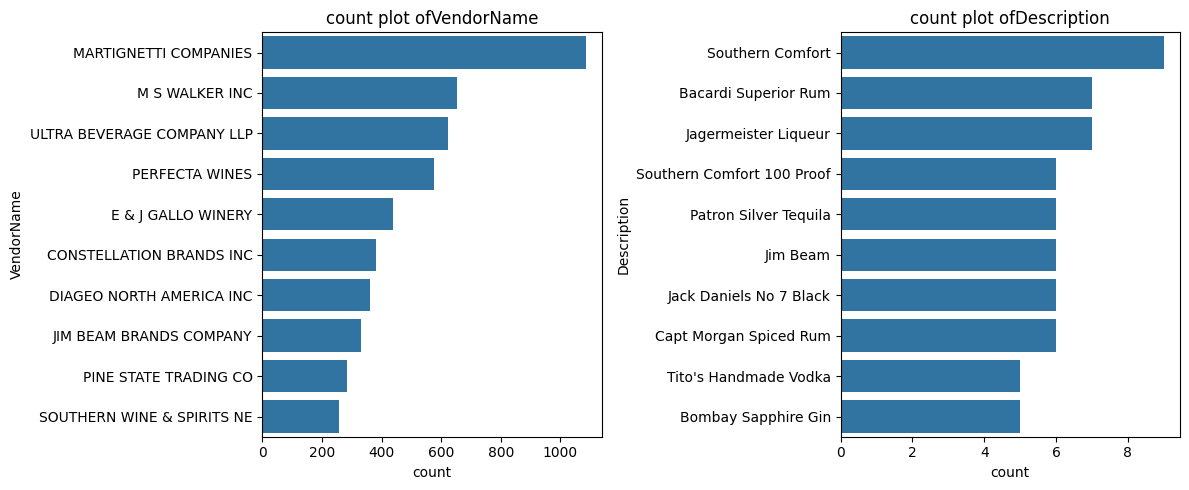

In [55]:
# countplot for categorical columns
categorical_cols=['VendorName','Description']

plt.figure(figsize=(12,5))
for i ,col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col],order=df[col].value_counts().index[:10])
    plt.title(f"count plot of{col}")
plt.tight_layout()
plt.show()

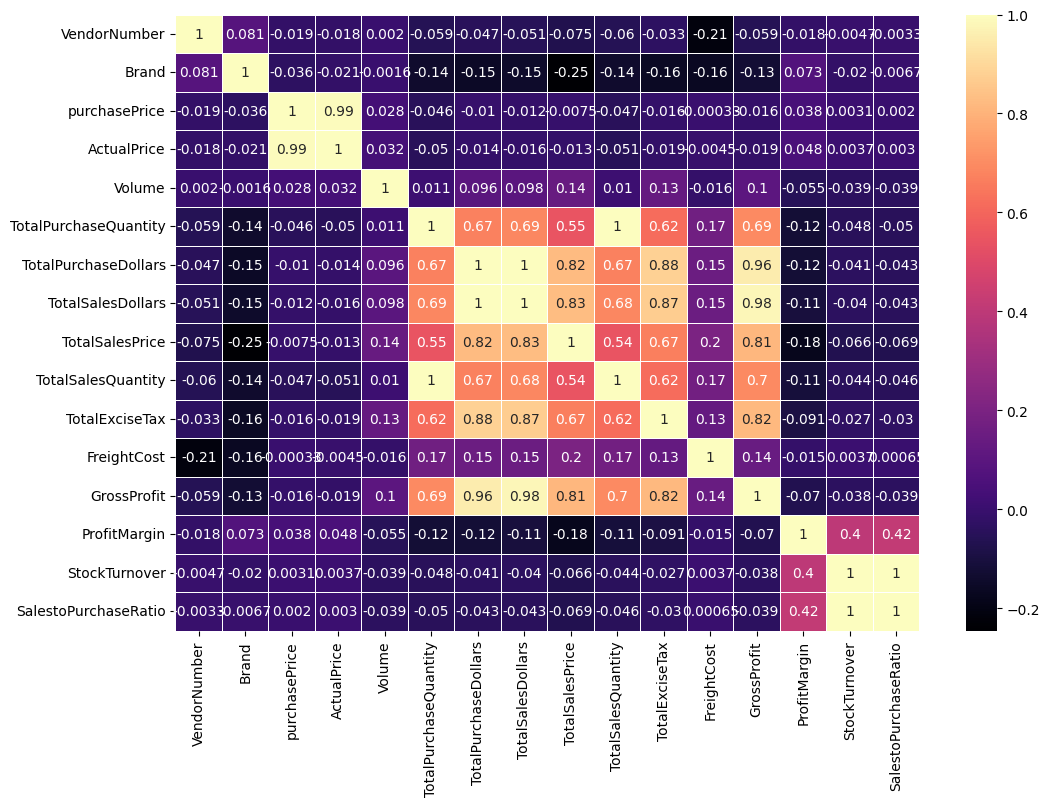

In [86]:
# correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df[numerical_cols].corr(),annot=True,cmap='magma',linewidths=0.5)
plt.show()

#### Correlation Insights
- PurchasePrice has weak correlations with TotalSalesDollars (-0.012) and GrossProfit (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.
- Strong correlation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover.
- Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.
- StockTurnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability.

### Data Analysis
##### QUES1 :-
 #### :Identify Brands that needs Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins?

In [125]:
brand_perfomance=df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'
}).reset_index()

In [127]:
brand_perfomance

,Description,TotalSalesDollars,ProfitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [129]:
low_sales_threshold=brand_perfomance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold=brand_perfomance['ProfitMargin'].quantile(0.85)

In [131]:
low_sales_threshold

560.299

In [133]:
high_margin_threshold

64.97017552750113

In [143]:
target_brand=brand_perfomance[
  (brand_perfomance['TotalSalesDollars']<=low_sales_threshold) &
  (brand_perfomance['ProfitMargin']>=high_margin_threshold)
  ]
print('Brand with high profit Margins but low sales')
display(target_brand.sort_values('TotalSalesDollars'))

Brand with high profit Margins but low sales


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


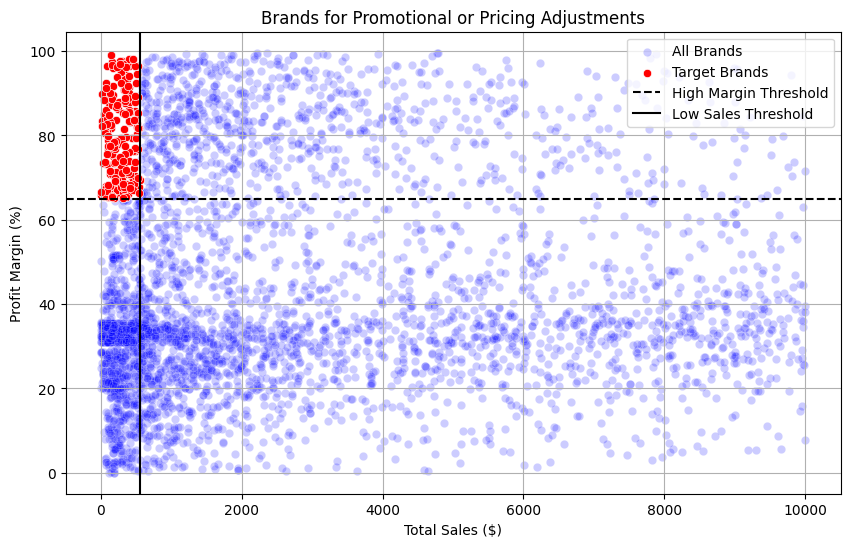

In [155]:
# Just for better Visualization
brand_perfomance=brand_perfomance[brand_perfomance['TotalSalesDollars']<10000]
plt.figure(figsize=(10, 6))

# All brands in blue (transparent)
sns.scatterplot(data=brand_perfomance, x='TotalSalesDollars', y='ProfitMargin',
                color="blue", label="All Brands", alpha=0.2)

# Target brands in red
sns.scatterplot(data=target_brand, x='TotalSalesDollars', y='ProfitMargin',
                color="red", label="Target Brands")

# Threshold lines
plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='-', color='black', label="Low Sales Threshold")

# Labels and title
plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")

plt.legend()
plt.grid(True)
plt.show()


##### QUES2:-
#### Which Vendor and Brands demonstrate the highest sales performance?

In [262]:
#Top vendors and Brands by top sales performance
top_vendors=df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_brands=df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)

In [264]:
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64

In [266]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [236]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"${value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"${value / 1_000:.2f}K"
    else:
        return f"${value:.2f}"


In [242]:
top_brands = top_brands.apply(lambda x: format_dollars(x))
top_brands

Description
Jack Daniels No 7 Black    $7.96M
Tito's Handmade Vodka      $7.40M
Grey Goose Vodka           $7.21M
Capt Morgan Spiced Rum     $6.36M
Absolut 80 Proof           $6.24M
Jameson Irish Whiskey      $5.72M
Ketel One Vodka            $5.07M
Baileys Irish Cream        $4.15M
Kahlua                     $3.60M
Tanqueray                  $3.46M
Name: TotalSalesDollars, dtype: object

In [244]:
top_vendors=top_vendors.apply(lambda x: format_dollars(x))
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      $67.99M
MARTIGNETTI COMPANIES         $39.33M
PERNOD RICARD USA             $32.06M
JIM BEAM BRANDS COMPANY       $31.42M
BACARDI USA INC               $24.85M
CONSTELLATION BRANDS INC      $24.22M
E & J GALLO WINERY            $18.40M
BROWN-FORMAN CORP             $18.25M
ULTRA BEVERAGE COMPANY LLP    $16.50M
M S WALKER INC                $14.71M
Name: TotalSalesDollars, dtype: object

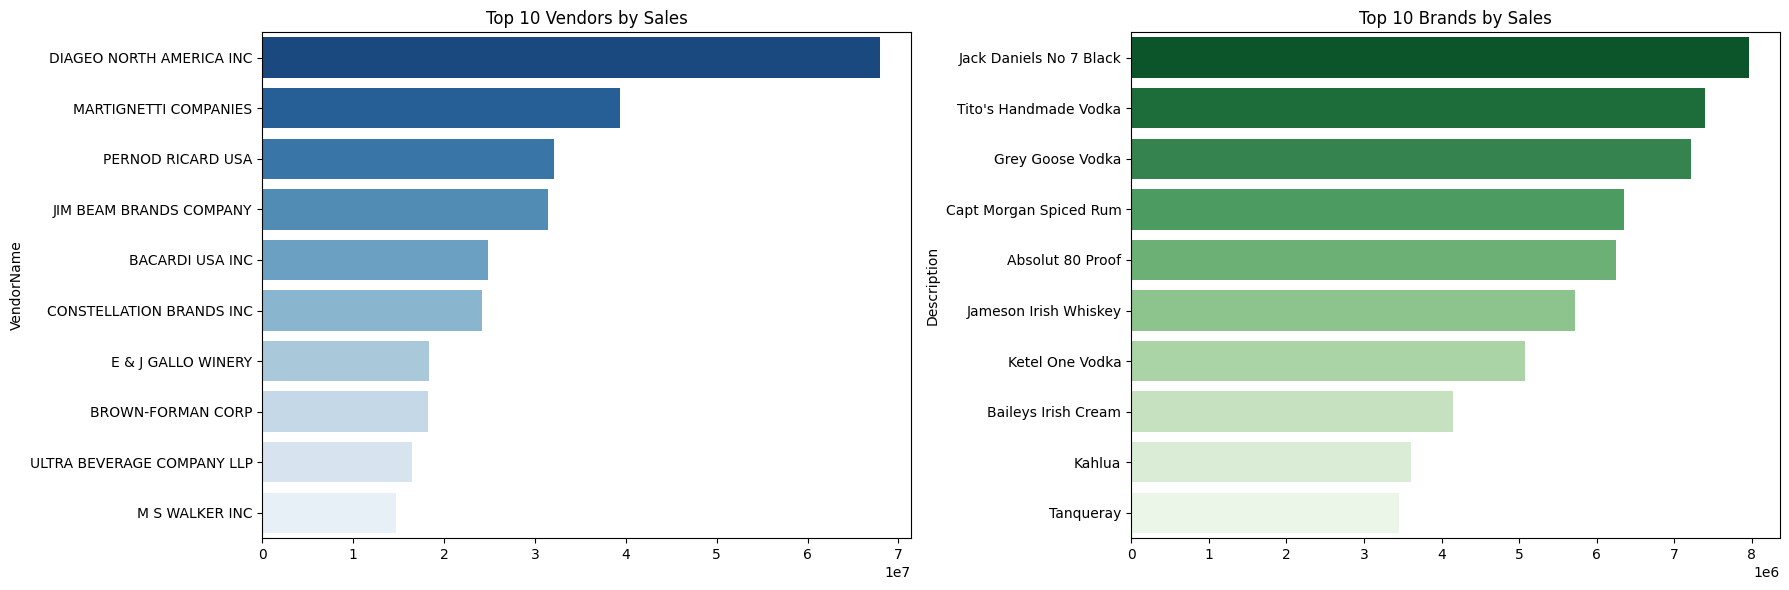

In [282]:
plt.figure(figsize=(18, 6))
# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")
# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index, x=top_brands.values, palette="Greens_r")
plt.title("Top 10 Brands by Sales")
plt.tight_layout()
plt.show()

#### QUES3:-
#### which vendor contribute most to the Total Purchase Dollars?

In [288]:
vendor_performance=df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()

In [290]:
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53
...,...,...,...,...
114,WEIN BAUER INC,42694.64,13522.49,56217.13
115,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83
116,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20
117,WINE GROUP INC,5203801.17,3100242.11,8304043.28


In [294]:
vendor_performance['PurchaseContribution%']=vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()

In [296]:
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution,PurchaseContribution%
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53,0.000001,0.000001
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94,0.000084,0.000084
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81,0.000038,0.000038
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16,0.000003,0.000003
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53,0.000340,0.000340
...,...,...,...,...,...,...
114,WEIN BAUER INC,42694.64,13522.49,56217.13,0.000139,0.000139
115,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83,0.000971,0.000971
116,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20,0.019121,0.019121
117,WINE GROUP INC,5203801.17,3100242.11,8304043.28,0.016932,0.016932


In [304]:
vendor_performancee=round(vendor_performance.sort_values('PurchaseContribution%',ascending=False),2)
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50097226.16,17892873.26,67990099.42,0.16,0.16
57,MARTIGNETTI COMPANIES,25502095.83,13828263.53,39330359.36,0.08,0.08
68,PERNOD RICARD USA,23851164.17,8212032.02,32063196.19,0.08,0.08
46,JIM BEAM BRANDS COMPANY,23494304.32,7928716.14,31423020.46,0.08,0.08
6,BACARDI USA INC,17432020.26,7422796.88,24854817.14,0.06,0.06
...,...,...,...,...,...,...
33,FANTASY FINE WINES CORP,128.64,198.95,327.59,0.00,0.00
107,UNCORKED,118.74,58.20,176.94,0.00,0.00
85,SILVER MOUNTAIN CIDERS,77.18,265.33,342.51,0.00,0.00
16,CAPSTONE INTERNATIONAL,54.64,192.23,246.87,0.00,0.00


In [308]:
# display top 10 vendors
vendor_performance=vendor_performance.head(10)
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50097226.16,17892873.26,67990099.42,0.16,0.16
57,MARTIGNETTI COMPANIES,25502095.83,13828263.53,39330359.36,0.08,0.08
68,PERNOD RICARD USA,23851164.17,8212032.02,32063196.19,0.08,0.08
46,JIM BEAM BRANDS COMPANY,23494304.32,7928716.14,31423020.46,0.08,0.08
6,BACARDI USA INC,17432020.26,7422796.88,24854817.14,0.06,0.06
20,CONSTELLATION BRANDS INC,15273708.08,8945037.57,24218745.65,0.05,0.05
11,BROWN-FORMAN CORP,13238939.18,5008291.47,18247230.65,0.04,0.04
30,E & J GALLO WINERY,12068539.22,6331360.24,18399899.46,0.04,0.04
106,ULTRA BEVERAGE COMPANY LLP,11167081.61,5335462.70,16502544.31,0.04,0.04
53,M S WALKER INC,9764312.60,4942145.91,14706458.51,0.03,0.03


In [330]:
vendor_performance['PurchaseContribution%'].sum()

0.6600000000000001

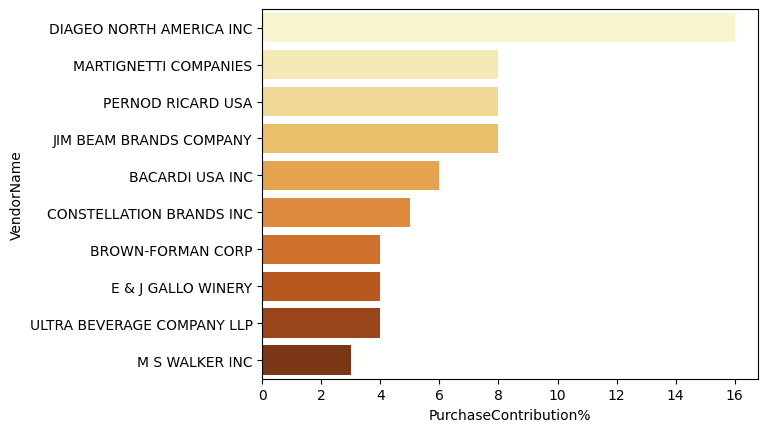

In [332]:
ax1 = sns.barplot(y=vendor_performance['VendorName'], x=vendor_performance['PurchaseContribution%']*100, palette="YlOrBr")

#### QUES:-
#### How much of total procurement is dependent on the top vendors?

In [359]:
print(f"Total Purchase Contribution of top 10 vendors is {round(vendor_performance['PurchaseContribution%'].sum()*100,2)} %")

Total Purchase Contribution of top 10 vendors is 66.0 %


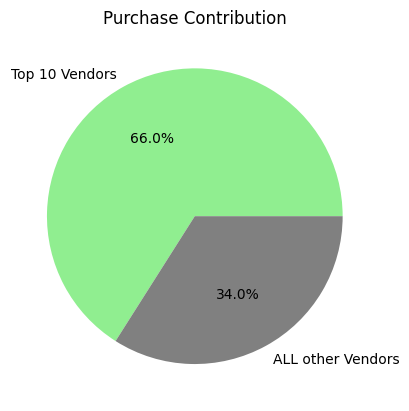

In [361]:
plt.pie([66, 34], labels=['Top 10 Vendors', 'ALL other Vendors'], autopct='%1.1f%%', colors=['lightgreen', 'grey'])
plt.title('Purchase Contribution')
plt.show()


#### QUES:-
#### Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [365]:
df['UnitPurchasePrice']=df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [369]:
# bucketize the vendor on the basis of purchase quantity
df['ordersize']=pd.qcut(df['TotalPurchaseQuantity'],q=3,labels=['small','medium','large'])

In [373]:
df[['ordersize','TotalPurchaseQuantity']]

,ordersize,TotalPurchaseQuantity
0,large,145080
1,large,164038
2,large,187407
3,large,201682
4,large,138109
...,...,...
8559,small,2
8560,small,6
8561,small,2
8562,small,1


In [417]:
df.groupby('ordersize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
ordersize,
small,39.068186
medium,15.486414
large,10.777625


<Axes: xlabel='ordersize'>

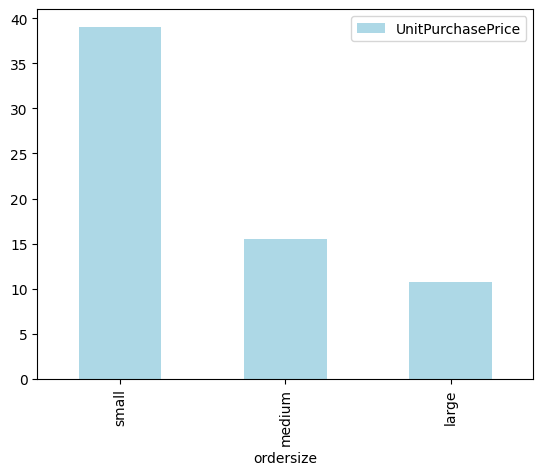

In [421]:
df.groupby('ordersize')[['UnitPurchasePrice']].mean().plot(kind='bar',color='lightblue')

- Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.

- The price difference between Small and Large orders is substantial (~72% reduction in unit cost)

- This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit

revenue.

#### QUES:-
#### Which vendors have low inventory turnover, indicating excess stock and slow-moving products?

In [437]:
# we are getting the vendorname and their stockturnover mean which has stockturn over is less than 1

df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending=True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


##### These 10 vendors having lowest inventory turnover

#### QUES:-
#### How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [445]:
df['UnsoldInventoryValue']=(df['TotalPurchaseQuantity']-df['TotalSalesQuantity'])*df['purchasePrice']

In [447]:
# total Capital locked in inventory
format_dollars(df['UnsoldInventoryValue'].sum())

'$2.71M'

In [449]:
# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,$722.21K
46,JIM BEAM BRANDS COMPANY,$554.67K
68,PERNOD RICARD USA,$470.63K
116,WILLIAM GRANT & SONS INC,$401.96K
30,E & J GALLO WINERY,$228.28K
79,SAZERAC CO INC,$198.44K
11,BROWN-FORMAN CORP,$177.73K
20,CONSTELLATION BRANDS INC,$133.62K
61,MOET HENNESSY USA INC,$126.48K
77,REMY COINTREAU USA INC,$118.60K


##### These were the Top 10 vendors with highest Unsold Inventory

#### QUES::-
#### What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors?

In [457]:
top_threshold = df ["TotalSalesDollars"].quantile(0.75)
low_threshold = df ["TotalSalesDollars"].quantile(0.25)

In [465]:
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

In [467]:
top_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3523    79.684817
3681    85.782102
4751    93.085860
4920    95.012530
5050    94.271857
Name: ProfitMargin, Length: 2141, dtype: float64

In [479]:
def confidence_interval(data, confidence=0.95):
    data = np.array(data)
    n = len(data)
    mean = np.mean(data)
    sem = stats.sem(data)  # Standard error of the mean
    margin = sem * stats.t.ppf((1 + confidence) / 2, df=n-1)
    return (mean,mean - margin, mean + margin)

In [481]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean: .2f}")
print(f"Low Vendors 95% CT: ({low_lower: .2f}, {low_upper:.2f}), Mean: {low_mean: .2f}")

Top Vendors 95% CI: (30.74, 31.61), Mean:  31.18
Low Vendors 95% CT: ( 40.50, 42.64), Mean:  41.57


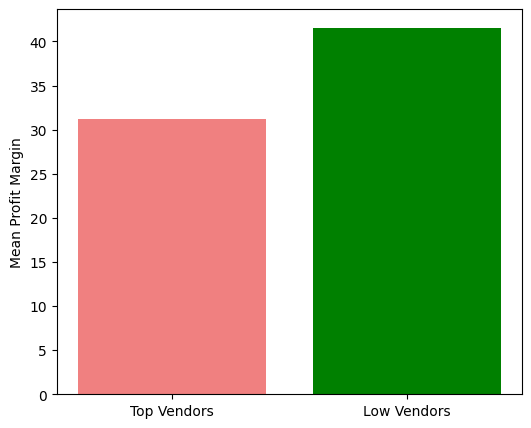

In [501]:
means = [top_mean, low_mean]
#errors = [top_mean - top_lower, low_mean - low_lower]
labels = ['Top Vendors', 'Low Vendors']

# Plot
plt.figure(figsize=(6, 5))
plt.bar(labels, means, capsize=10, color=['lightcoral', 'green'])
plt.ylabel('Mean Profit Margin')
plt.show()

- The confidence interval for low-performing vendors (40.48% to 42.62%) is significantly higher than that of top-performing vendors (30.74% to 31.61%).
- This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.
- For High-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies.
- For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.

#### Is there a significant difference in profit margins between top-performing and low-performing vendors?
##### Hypothesis:
-H0 (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.

-H1 (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.

In [511]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

In [513]:
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

In [515]:
# Perform Two-Sample T-Test (Welch’s t-test)
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

In [517]:
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

T-Statistic: -17.6695, P-Value: 0.0000


In [519]:
if p_value < 0.05:
    print("Reject H₀: Significant difference in profit margins between top and low vendors.")
else:
    print("Fail to Reject H₀: No significant difference in profit margins.")

Reject H₀: Significant difference in profit margins between top and low vendors.


In [521]:
df.head()

,VendorNumber,VendorName,Brand,Description,purchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,...,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice,ordersize,UnsoldInventoryValue
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,5101919.51,...,142049.0,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27,large,79624.37
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,4819073.49,...,160247.0,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19,large,87913.29
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,4538120.60,...,187140.0,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24,large,4870.08
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,4475972.88,...,200412.0,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17,large,20535.90
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,4223107.62,...,135838.0,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89,large,49712.19


In [525]:
df.to_csv('Downloads/vendor_sales_summary.csv',index=False)